<a href="https://colab.research.google.com/github/JoyNjihia/WEEK-3-AI-FOR-S.E-ASSIGNMENT/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting MNIST Handwritten Digits Classification Task...
Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST dataset loaded: 60000 training samples, 10000 testing samples.
Data preprocessing complete: Reshaped and normalized images, one-hot encoded labels.
Building CNN model architecture...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

CNN model built and compiled.
Training the CNN model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 104ms/step - accuracy: 0.7913 - loss: 0.6520 - val_accuracy: 0.9823 - val_loss: 0.0597
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.9668 - loss: 0.1118 - val_accuracy: 0.9873 - val_loss: 0.0433
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.9885 - val_loss: 0.0364
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9805 - loss: 0.0640 - val_accuracy: 0.9905 - val_loss: 0.0330
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.9839 - loss: 0.0524 - val_accuracy: 0.9922 - val_loss: 0.0304
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9876 - loss: 0.0432 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9872 - loss: 0.0403 - val_accuracy: 0.9907 - val_loss: 0.0320
Epoch 8/10
422/422 ━━━━━━━━━━━━━

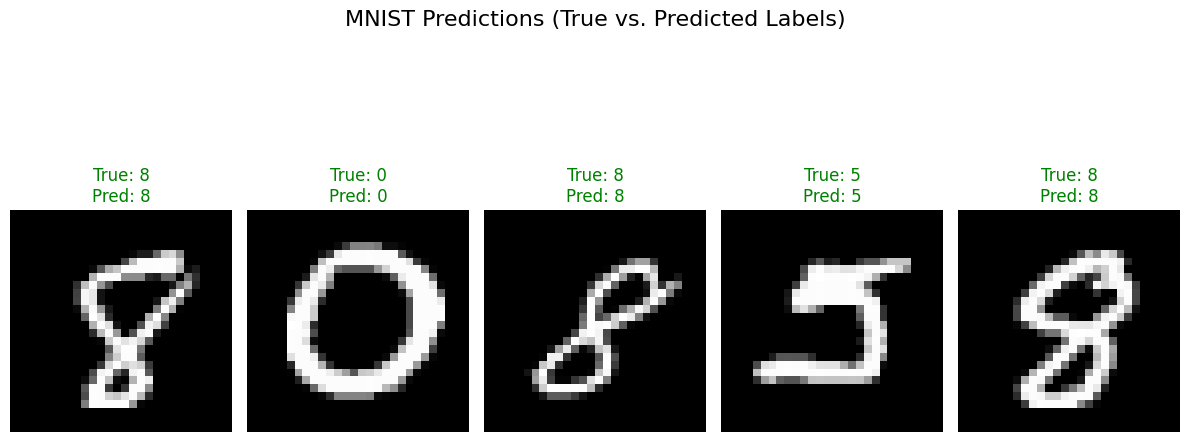

MNIST Handwritten Digits Classification Task completed.


In [ ]:
# Task 2: Deep Learning with TensorFlow/Keras
# Dataset: MNIST Handwritten Digits
# Goal: Build a CNN model to classify handwritten digits, achieve >95% test accuracy,
#       and visualize model's predictions on 5 sample images.

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print("Starting MNIST Handwritten Digits Classification Task...")

# 1. Load the MNIST Dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"MNIST dataset loaded: {len(X_train)} training samples, {len(X_test)} testing samples.")

# 2. Preprocess the data

# Reshape the data to add a channel dimension (for CNN input)
# MNIST images are 28x28 grayscale, so channel is 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the target variable
num_classes = 10  # Digits 0-9
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Data preprocessing complete: Reshaped and normalized images, one-hot encoded labels.")

# 3. Build the CNN Model
print("Building CNN model architecture...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5), # Add dropout for regularization

    Dense(num_classes, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
print("CNN model built and compiled.")

# 4. Train the model
print("Training the CNN model...")
history = model.fit(
    X_train, y_train,
    epochs=10, # You can adjust this for more training
    batch_size=128,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)

print("CNN model training complete.")

# 5. Evaluate the model
print("Evaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

if accuracy > 0.95:
    print("\nGoal achieved: Test accuracy > 95%!")
else:
    print("\nGoal not yet achieved: Test accuracy is not > 95%. Consider more epochs or model tuning.")

# 6. Visualize the model's predictions on 5 sample images
print("\nVisualizing predictions on 5 sample images...")

# Get 5 random indices from the test set
random_indices = np.random.choice(len(X_test), 5, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    img = X_test[idx]
    true_label = np.argmax(y_test[idx])

    # Make prediction
    prediction = model.predict(np.expand_dims(img, axis=0), verbose=0)
    predicted_label = np.argmax(prediction)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}",
              color='green' if true_label == predicted_label else 'red')
    plt.axis('off')

plt.suptitle("MNIST Predictions (True vs. Predicted Labels)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("MNIST Handwritten Digits Classification Task completed.")